In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
from SKL_search import *
warnings.filterwarnings("ignore")

In [25]:
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'

In [26]:
# Choosing different features to benchmark
output_feature_fname = 'Lookback10'
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train_' + output_feature_fname + '.csv', index_col=0)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test_' + output_feature_fname + '.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train_' + output_feature_fname + '.csv', index_col=0)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test_' + output_feature_fname + '.csv', index_col=0)

In [27]:
from sklearn.model_selection import train_test_split
X_tr_sj, X_val_sj, Y_tr_sj, Y_val_sj = train_test_split(sj_feature_train.drop('total_cases', axis = 1), sj_feature_train['total_cases'], test_size = 0.001, random_state = 4)
X_tr_iq, X_val_iq, Y_tr_iq, Y_val_iq = train_test_split(iq_feature_train.drop('total_cases', axis = 1), iq_feature_train['total_cases'], test_size = 0.001, random_state = 4)

In [10]:
X_tr_sj.head()

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),var5(t-9),...,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1)
614,0.137865,0.121533,-0.385911,0.000000,0.369460,0.033712,0.025087,-0.692190,0.000000,0.246672,...,-0.804988,-0.820627,-0.961715,-1.000000,-0.179855,-0.797314,-0.812265,-0.771822,-1.000000,-0.221996
717,-0.240921,-0.249199,-0.441041,-0.500000,0.493971,-0.139509,-0.162230,-0.673813,-0.272727,0.369460,...,-0.937097,-1.002369,-1.108729,-1.272727,-0.133839,-0.725504,-0.745366,-0.955590,-1.545455,-0.179855
784,-0.978210,-1.038606,-0.588055,-1.272727,-0.374707,-0.830204,-0.870244,-0.349158,-1.272727,-0.409986,...,-0.061121,-0.057422,0.036753,0.227273,-0.541333,0.268878,0.245296,-0.404288,-0.272727,-0.530953
114,-0.741401,-0.798885,0.067381,0.227273,-0.542448,-0.415239,-0.478328,-0.183767,-0.272727,-0.541333,...,0.374126,0.365714,0.545176,0.500000,-0.250100,0.320406,0.323345,0.863706,1.272727,-0.167904
368,-1.001233,-1.045854,-1.059724,-0.772727,-0.409986,-0.999589,-1.049199,-0.814701,-1.000000,-0.443178,...,-0.263944,-0.253101,0.153139,-0.272727,-0.530953,-0.320406,-0.306620,0.159265,0.500000,-0.510605


In [28]:
# SKLearn Models comparison
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [29]:
models1 = { 
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'LinearRegression': linear_model.LinearRegression()
    #'NNRegressor': neighbors.KNeighborsRegressor()
}

params1 = {  
    'RandomForestRegressor': { 'n_estimators': [1000], 'max_depth':[2,5,10,20], 'max_features':['sqrt', 10, 20]},
    'GradientBoostingRegressor': { 'n_estimators': [1000], 'max_features': ['sqrt',10, 20], 'max_depth': [2,5,10,10] },
    'SVR': [
        {'kernel': ['linear'], 'C': [0.05, 0.01], 'degree':[1], 'epsilon':[0.2, 0.5, 1]}],
    'LinearRegression': {'n_jobs':[-1]}
    #'NNRegressor': {'n_neighbors':[125]}   
}

In [13]:
sj_helper = EstimatorSelectionHelper(models1, params1)
sj_helper.fit(X_tr_sj, Y_tr_sj, scoring='neg_mean_absolute_error', cv = 2)

Running GridSearchCV for RandomForestRegressor.
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:   13.4s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:   16.8s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   24.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for GradientBoostingRegressor.
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    5.1s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:    6.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for SVR.
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Running GridSearchCV for LinearRegression.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


In [16]:
sj_skl_models = sj_helper.score_summary(sort_by='mean_score')
sj_skl_models

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [30]:
def fit_and_predict(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), train['total_cases'])
    test_preds = mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))
    train_preds = mod.predict(train.drop('total_cases', axis = 1))
    fig, ax = plt.subplots(figsize = (20,10))
    train_error = np.round(mean_absolute_error(train_preds, train['total_cases']),1)
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    ax.set_title(str(mod).split('(')[0] + ' mean train error: ' + str(train_error))
    return(mod, train_preds, test_preds)

In [31]:
def fit_and_predict_log(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), np.log(1+train['total_cases']))
    test_preds = np.exp(mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))) -1
    train_preds = np.exp(mod.predict(train.drop('total_cases', axis = 1))) - 1
    fig, ax = plt.subplots(figsize = (20,10))
    train_error = np.round(mean_absolute_error(train_preds, train['total_cases']),1)
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    ax.set_title(str(mod).split('(')[0] + ' mean train error: ' + str(train_error))
    return(mod, train_preds, test_preds)

In [32]:
SVR_mod = SVR(C = 0.05, degree = 1, epsilon = 0.1, kernel = 'linear')
GB_mod = GradientBoostingRegressor(n_estimators = 1000, max_depth = 10, max_features = 10)
RF_mod = RandomForestRegressor(n_estimators = 1000)
#NN_mod = neighbors.KNeighborsRegressor(n_neighbors = 2)
#MLP_NN = MLPRegressor((100), max_iter = 1000,learning_rate = 'invscaling', activation = 'relu')

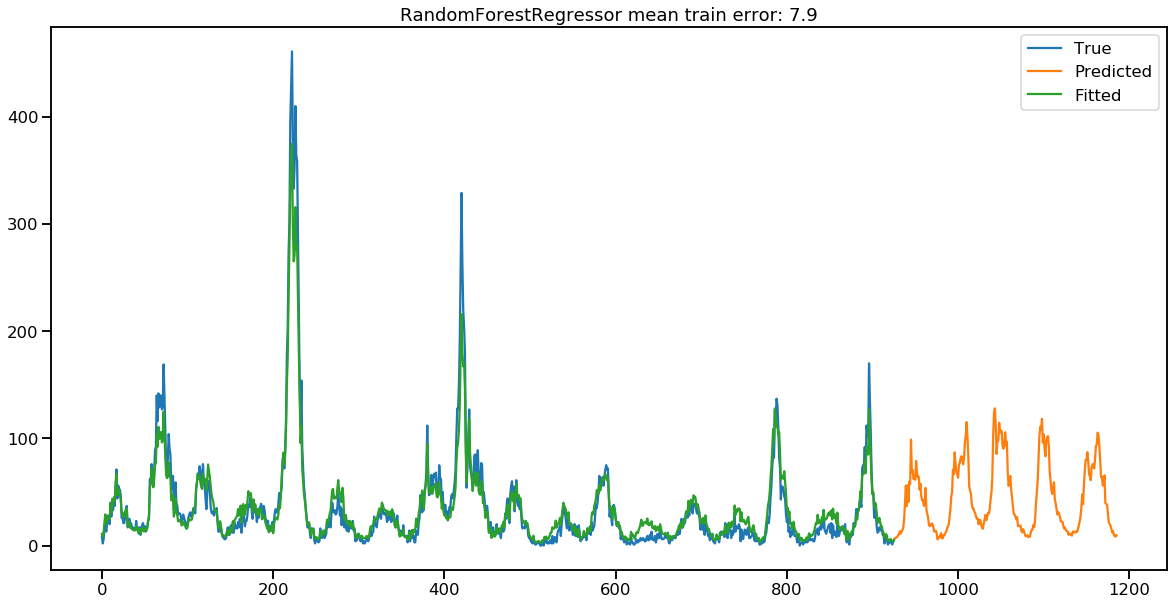

In [33]:
sj_RF_mod, sj_RF_fitted_vals, sj_RF_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, RF_mod)

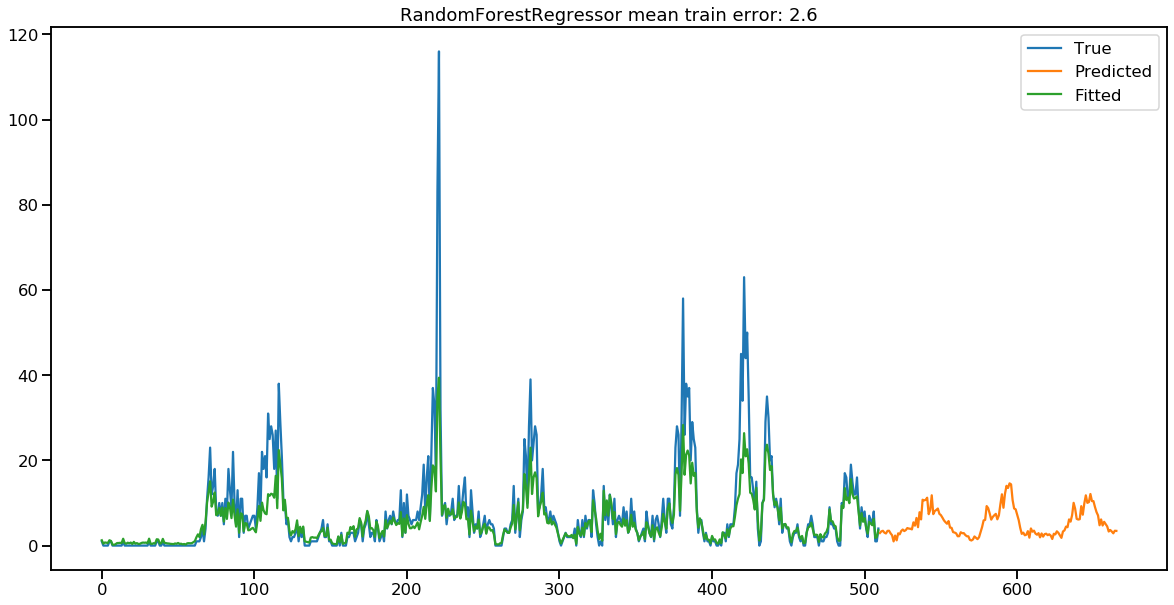

In [34]:
iq_RF_mod, iq_RF_fitted_vals, iq_RF_test_preds = fit_and_predict_log(iq_feature_train, iq_feature_test, RF_mod)

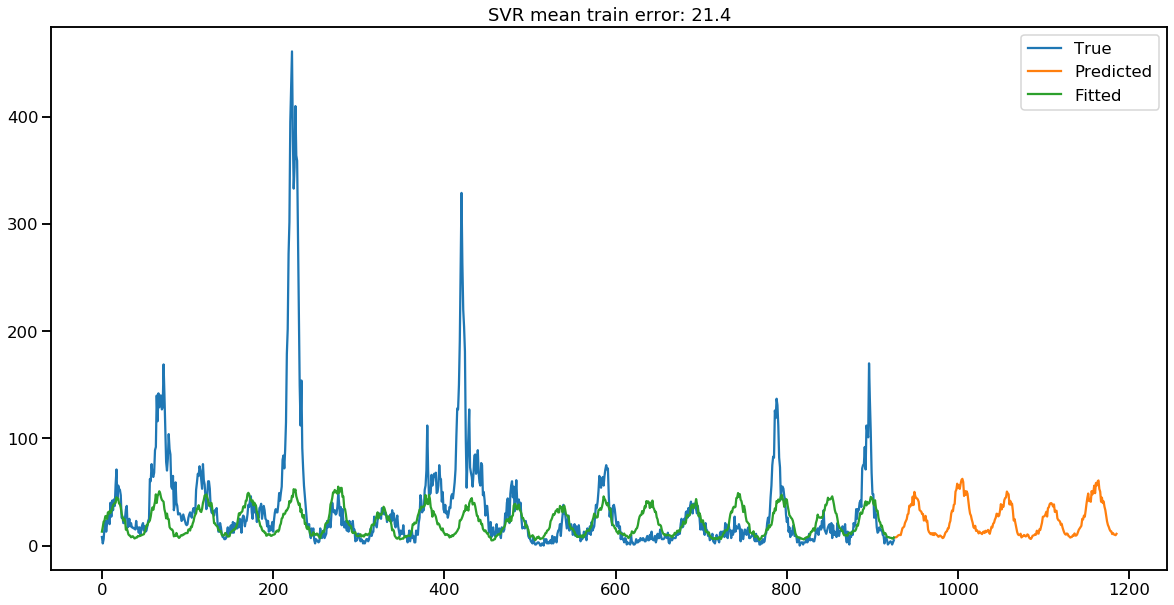

In [22]:
sj_SVR_mod, sj_SVR_fitted_vals, sj_SVR_test_preds = fit_and_predict_log(sj_feature_train, sj_feature_test, SVR_mod)

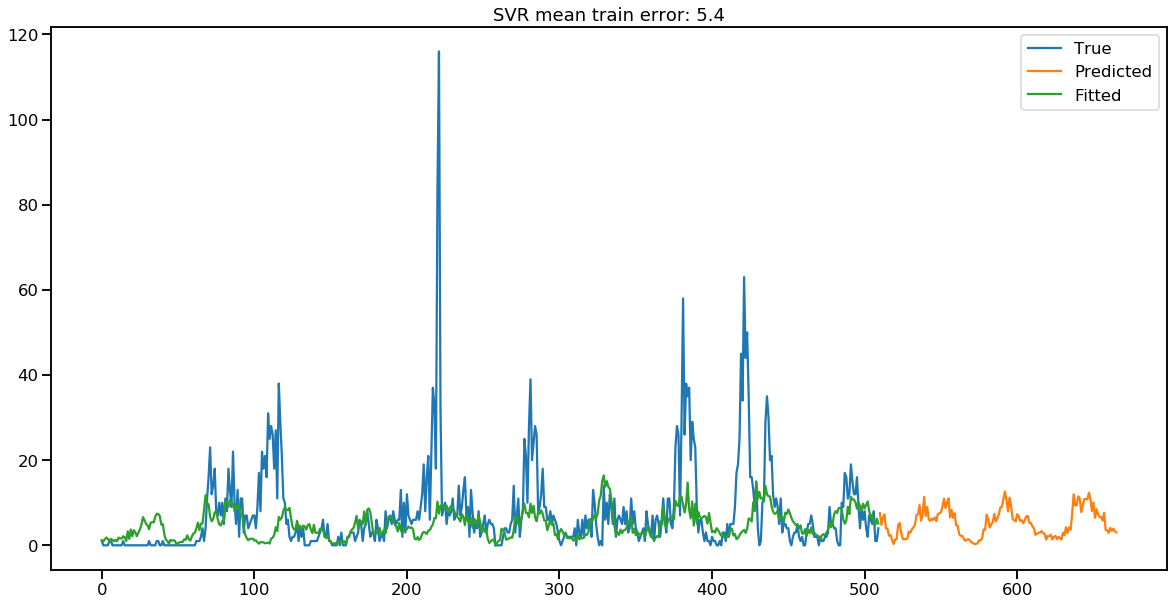

In [23]:
iq_SVR_mod, iq_SVR_fitted_vals, iq_SVR_test_preds = fit_and_predict_log(iq_feature_train, iq_feature_test, SVR_mod)

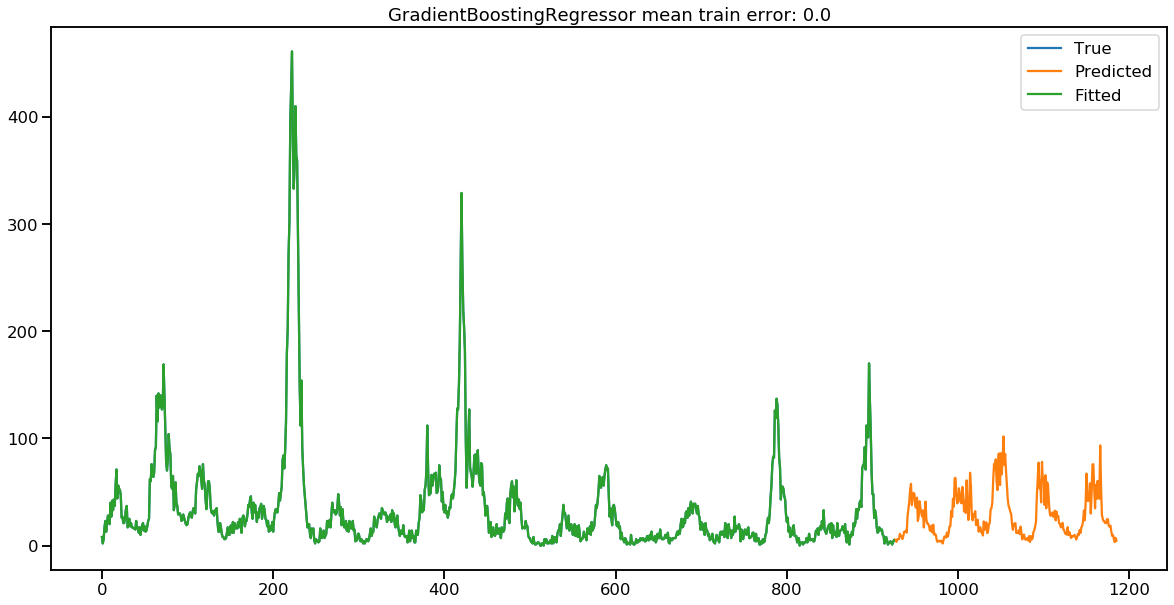

In [36]:
sj_GB_mod, sj_GB_fitted_vals, sj_GB_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, GB_mod)